# ✅ Win32com(pywin32)

- win32com, pywin32라고도 합니다.
- Microsoft에서 제공하는 윈도우 프로그램을 파이썬으로 다룰 수 있도록 하는 라이브러리
- Outlook 메일, Powerpoint, Word, Excel 등을 제어할 수 있습니다.
- 윈도우 프로그램의 실제 기능적인 측면에서 접근 가능합니다 
    👉 실제 엑셀 프로그램에서 사용하는 기능기반
<br>참고 사이트
https://wikidocs.net/135798

# ✅ 설치방법

In [1]:
!pip install pywin32


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


---

# ✅ 엑셀 다루기

## 🎯 엑셀 프로그램 실행, 띄우기

In [44]:
excel.Quit()

In [2]:
# 엑셀 프로그램 실행, 빈화면 띄우기
# !pip install pywin32
import win32com.client

excel = win32com.client.Dispatch("Excel.Application")
#wb = excel.Workbooks.Open("D:\jupyter_notebook_Source\python_intermediate\data\outlook결과파일.xlsx")
excel.Visible = True

## 🎯 Workbook 및 Worksheet 객체 생성

In [9]:
wb = excel.Workbooks.Add()
ws = wb.Worksheets("sheet1")

## 🎯 Cell 접근하기

In [13]:
if ws.Cells(1,1).Value == 'A1':
    ws.Cells(1,1).Value ='TEST'

In [94]:
#A1칸에 "A1" 넣기
ws.Cells(1,1).Value = "A1"

#A2칸에 "A2" 넣기
# ws.Cells(2,1).Value = "A2"
# ws.Range("A2").Value = "A2"

# # #B1~B4칸에 "B1B4" 넣기
ws.Range("B1:B4").Value = "B1B4"

# # #C1~C4칸에 "C1C4" 넣기
ws.Range(ws.Cells(1,3), ws.Cells(4,3)).Value = "C1C4"
# ws.Range("C1:C4").Value = "C1C4"
# # ws.Cells(1,3) => C1 

# #Cell 자동채우기
# #A1~A2를 기준으로 A1~A10 자동채우기
# ws.Range("A1:A2").AutoFill(ws.Range("A1:A10"))

# print(ws.Cells(1,1).Value)
if ws.Cells(1,1).Value == 'A1':
    ws.Cells(1,1).Value ='TEST'

## 🎯 파일 저장

In [49]:
# 일반 저장하기
wb.Save()
# 다른이름으로 저장하기
wb.SaveAs('C:\\Users\\20605\\OneDrive - Amkor Technology\\홍인기\\saveas.xlsx')

## 🎯 엑셀 종료하기

In [15]:
#위에서 dispatch 했던 변수
wb.Save()
excel.Quit()

👉 이미 있는 엑셀 파일을 load 하여 작업하고 싶을 때

In [17]:
import openpyxl
wb = openpyxl.load_workbook('C:/Users/20605/OneDrive - Amkor Technology/홍인기/[Python] 교육/python_intermediate/data/outlook결과파일.xlsx')
sheet = wb['Sheet1']
print(sheet.cell(row=2, column=2).value)

영남이공대, 대구·경북 마이스터·특성화 고교생 215명 취업


---

# ✅ Outlook 이메일 다루기

폴더 객체에 대한 설명
https://docs.microsoft.com/ko-kr/office/vba/api/Outlook.Folder

## 🎯 Outlook 실행하기

In [16]:
# outlook 프로그램 실행, 빈화면 띄우기
import win32com.client
import os

outlook = win32com.client.Dispatch("Outlook.Application")

# outlook 보기 -> outlook이 실행 됌!
os.startfile("outlook")

## 🎯 새로운 메일 생성하기

In [18]:
newMail = outlook.CreateItem(0)

#메일 to
newMail.To = "SunHee.Na@amkor.co.kr"

#메일 cc걸기
newMail.CC = "SunHee.Na@amkor.co.kr"

#메일 제목
newMail.Subject = "win32com 테스트 메일입니다."

#메일 내용
newMail.HTMLBody = ''' 테스트 메일입니다. 
테스트 메일입니다. 2'''
# newMail.Body = "win32com 테스트 메일 입니다. \n 본문 이지요"

#메일 임시저장하기
#newMail.Save()

#메일 보내기
newMail.Send()

## 🎯 받은 편지함 폴더 접근하여 메시지 불러오기

In [ ]:
    3 = 휴지통
    4 = 보낼 편지함
    5 = 보낸 편지함 
    6 = 받은 편지함

### 📑 각종 속성들

👀 참조 사이트: https://docs.microsoft.com/en-us/office/vba/api/outlook.items

inbox -
.Folders
.Items
<br>
messages -
.GetFirst()
.GetLast()
.GetNext()
.GetPrevious()
.Attachments
<br>
message -
.Subject
.Body
.To
.Recipients
.Sender
.Sender.Address
<br>
attachments -
.item()
.Count
<br>
attachment -
.filename

In [24]:
#outlook.GetDefaultFolder(6) 👉 받은 편지함을 의미한다.
# .Folders[name] 👉 받은 편지함 하위 name 폴더에 접근

import win32com.client
import os

def accessFolder(folderName):
    outlook = win32com.client.Dispatch("Outlook.Application").GetNamespace("MAPI")
    targetFolder = outlook.GetDefaultFolder(6).Folders[folderName]
    return targetFolder

targetFolder = accessFolder("EXCEL_MERGE")
# temp = targetFolder.UnReadItemCount
# print(temp)

msg_list = targetFolder.items
# print(msg_list)
# a = msg_list.GetFirst()
# print(a.Subject)
# print(msg_list.count)
for msg in msg_list:
  #print(msg.Subject)
    if msg.UnRead == True:
        print(msg.Subject)
        msg.UnRead = False
    

뉴스 크롤링 결과
FW: 네이버뉴스크롤링엑셀파일1


## 🎯 파일을 저장하는 방법

In [25]:
downpath = r"C:\\python\\"
for msg in msg_list:
    attachments = msg.Attachments 
    r = attachments.count
    print(r)
    for i in range(1, r + 1):
        attachment = attachments.Item(i)
        print(attachment)
        attachment.SaveASFile(f"{downpath}"+str(attachment))  # 파일명을 넣어야 함.

1
찌라시뉴스.xlsx
1
네이버뉴스크롤링result.xlsx


## ⏺ 실습: 메시지 데이터 불러오기

- 위에서 불러온 메시지들의 데이터를 읽어봅시다.
- ➕ 해당 데이터를 dataframe으로 변환하고 excel 파일로 저장해봅시다.

### 1️⃣ 메시지 데이터 읽기 

- 몇번째로 받았는지, TO, CC, Subject를 출력해봅시다.
- 실행결과는 다음과 같습니다
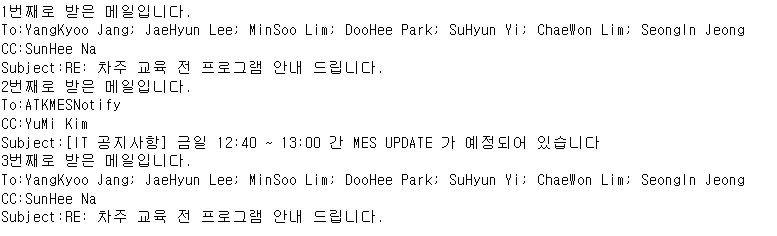

- (+ 몇개까지 읽을지도 함수인자로 넘겨 설정해봅시다.)


In [73]:
#
def readMsg(msg_list, msg_num):
    msg_idx = 1
    toList = list()
    ccList = list()
    for msg in msg_list:
        print(f"{msg_idx}번째로 받은 메일입니다.")
        print(f"To:{msg.To}")
        print(f"CC:{msg.CC}")
        toList.append(msg.To)
        print(f"Subject:{msg.Subject}")
        #print(f"Attach: {msg.Attachments.item}")
        #print(f"Body: {msg.Body}")
        #print()
        msg_idx += 1
        if msg_idx == msg_num+1: break

readMsg(msg_list, 5)

1번째로 받은 메일입니다.
To:YangKyoo Jang; JaeHyun Lee; MinSoo Lim; DooHee Park; SuHyun Yi; ChaeWon Lim; SeongIn Jeong
CC:SunHee Na
Subject:RE: 차주 교육 전 프로그램 안내 드립니다.
2번째로 받은 메일입니다.
To:ATKMESNotify
CC:YuMi Kim
Subject:[IT 공지사항] 금일 12:40 ~ 13:00 간 MES UPDATE 가 예정되어 있습니다 
3번째로 받은 메일입니다.
To:YangKyoo Jang; JaeHyun Lee; MinSoo Lim; DooHee Park; SuHyun Yi; ChaeWon Lim; SeongIn Jeong
CC:SunHee Na
Subject:RE: 차주 교육 전 프로그램 안내 드립니다.


### 2️⃣ 메시지 엑셀로 저장하기

👉 pandas 라이브러리 Dataframe 자료형을 이용하여 해당 메시지를 excel 파일로 저장해봅시다.

In [ ]:
# 힌트
msg.Sender
msg.To
msg.CC
msg.Subject
msg.Attachments
msg.Body

-예상되는 결과

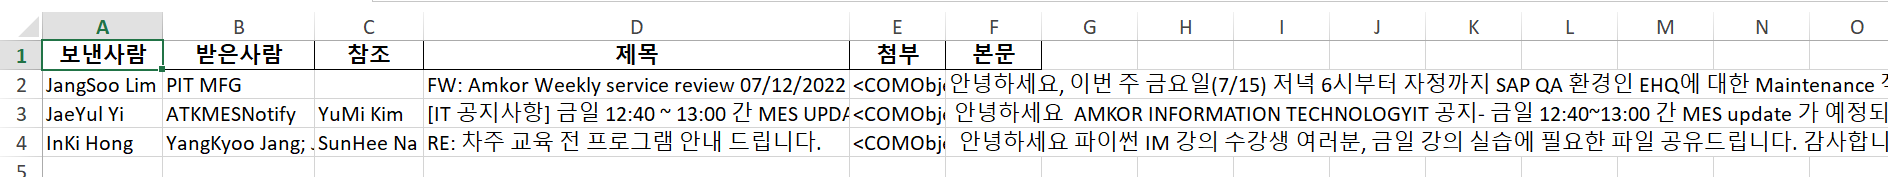

In [78]:
#
import pandas as pd

def msgToXlsx(msg_list, msg_num, xlsx_title):
    
    fromList = []
    toList = []
    ccList = []
    subjectList = []
    attachList = []
    bodyList = []

    msg_idx = 1
    for msg in msg_list:
        fromList.append(msg.Sender)
        toList.append(msg.To)
        ccList.append(msg.CC)
        subjectList.append(msg.Subject)
        attachList.append(msg.Attachments)
        bodyList.append(msg.Body)
        msg_idx += 1
        if msg_idx == msg_num+1: break
    
    msg_df = pd.DataFrame({
        "보낸사람":fromList,
        "받은사람" : toList,
        "참조" : ccList,
        "제목" : subjectList,
        "첨부" : attachList,
        "본문" : bodyList
    })
    
    msg_df.to_excel( xlsx_title, index = False)

msgToXlsx(msg_list, 5, "data/메시지저장.xlsx")

---

# ⏺ 실습1: Intranet 식단표 메일전송하기

- input으로 몇주차인지 입력받고 해당하는 주차의 식단표 본인에게 메일로 보내도록 구성해봅시다.
- bs4 라이브러리와 win32com 라이브러리를 사용해봅시다.
    - 🔺 Hint = OUTLOOK에서는 HTML을 사용할 수 있습니다.
    
- 예상결과
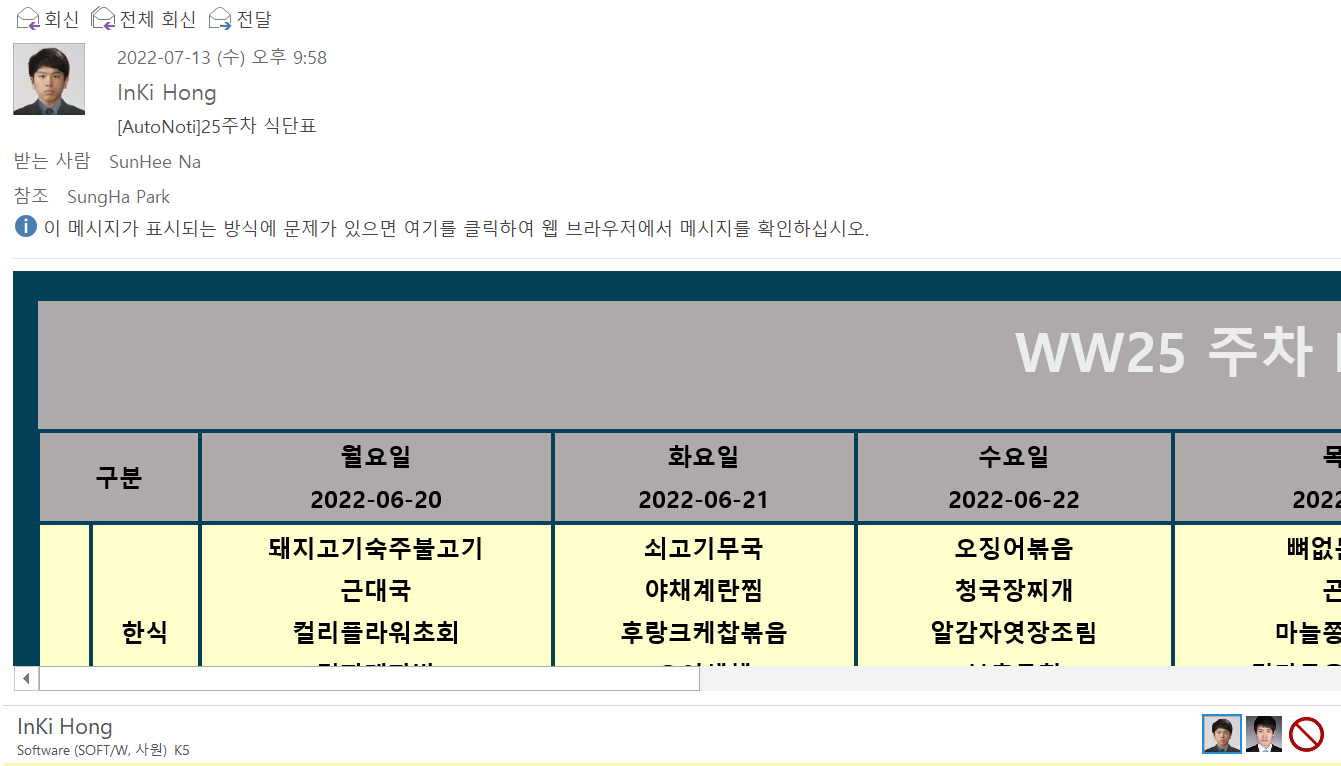

In [3]:
# f-string 사용법
a = "변수 집어넣기 테스트 입니다"
문자열 = f"나머지 멘트/{a}/"
문자열

'나머지 멘트/변수 집어넣기 테스트 입니다/'

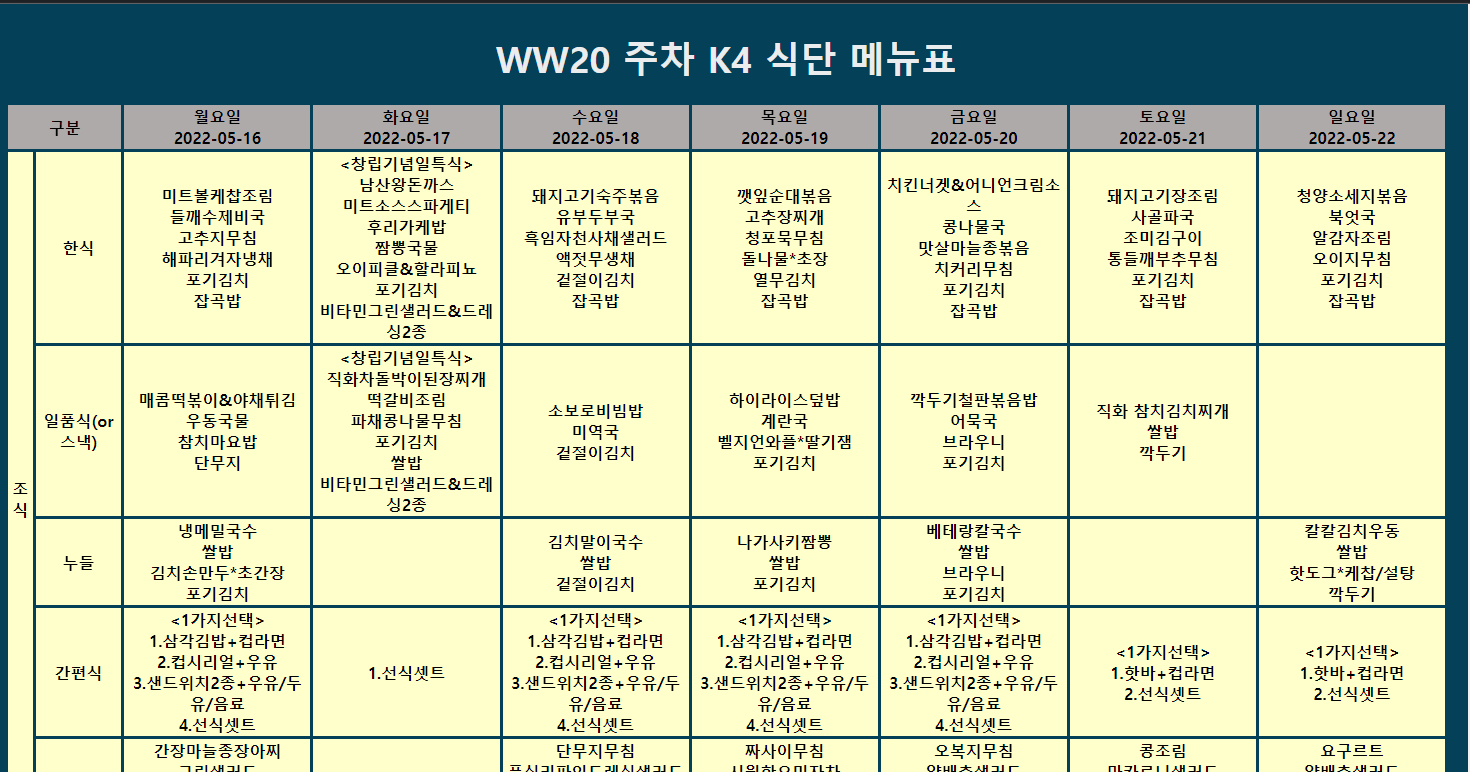

In [12]:
#
import pandas as pd
import requests
from bs4 import BeautifulSoup
import win32com.client

# 인트라넷에서 식단표 가져오기
today_week = str(input("몇 주차인지 입력하세요: "))

response = requests.get(f"https://intranet.amkor.co.kr/app/service/carte/view/detail?plant=S&year=2022&week={today_week}")
html = response.text
soup = BeautifulSoup(html, 'html.parser')
# print(soup.prettify())

# 메일쓰기
outlook = win32com.client.Dispatch("Outlook.Application")
newMail = outlook.CreateItem(0)

newMail.to = "sunhee.Na@amkor.co.kr"
newMail.cc = "sunhee.Na@amkor.co.kr"
newMail.subject = f"[AutoNoti]{today_week}주차 식단표"
newMail.HTMLBody = str(soup)
newMail.save()
#newMail.send()

몇 주차인지 입력하세요: 34


TypeError: Objects of type 'BeautifulSoup' can not be converted to a COM VARIANT (but obtaining the buffer() of this object could)

---

# ⏺ 실습2: 메일 엑셀 첨부파일 자동 취합하기
- HEAD 형식이 동일한 엑셀 파일을 합쳐 하나의 파일로 생성 해 봅시다
- 받은 편지함의 EXCEL_MERGE라는 폴더에 포워드 해 드린 엑셀 메일을 
  넣어 둡시다.

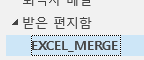

1. 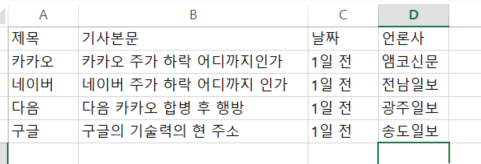

2. 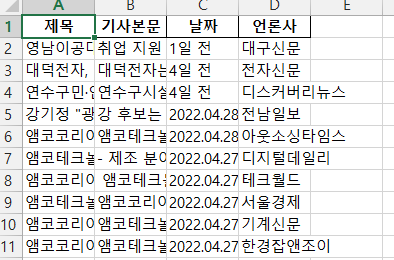

In [4]:
#os.listdir(path) => 해당 경로에 모든 파일 출력
import os 
print(os.listdir('C:\\실습파일\\'))

1. 메일에서 attachments 다운로드
2. os.listdir 이용해서 다운 받은 엑셀들 다시 불러오기
3. df으로 병합
4. df.to_excel 로 저장

['1_찌라시뉴스.xlsx', '2_네이버뉴스크롤링result.xlsx']


In [1]:
#
import win32com.client
import os
import pandas as pd

#outlook 정해진 폴더에서 첨부파일을 다운로드 하는 함수
#foldername : outlook 폴더명, downpath : 다운받을 위치
def att_down(foldername, downpath):
    outlook = win32com.client.Dispatch("Outlook.Application").GetNamespace("MAPI")
    inbox = outlook.GetDefaultFolder(6).Folders[foldername]
    messages = inbox.Items

    no = 1 #중복 파일명이 있을 것을 대비해 추가한 파일명 인덱스
    m_count = 1 #메일 카운트
    #각 메일마다 첨부파일을 다운로드 하는 루프
    for ms in messages:
        attachments = ms.Attachments #해당 메일의 첨부파일 개수(integer)
        r = attachments.count
        print(str(m_count)+"번째 메일 첨부파일 개수 : ",str(r)+"개")
        m_count=m_count+1
        for i in range(1, r + 1):
            attachment = attachments.Item(i)
            attachment.SaveASFile(downpath + str(no) + "_" + str(attachment))  # 파일명을 넣어야 함.
            no = no + 1

# os.listdir => 해당경로의 파일들을 전부 출력
def att_df(downpath, filepath):
    filelist = os.listdir(filepath)
    df_list = []
    
    for file in filelist:
        print(file)

    #각각 파일을 데이터프레임화해서 리스트에 넣기 
    for fn in filelist:
        df = pd.read_excel(downpath+"/"+fn, engine="openpyxl")
        #dropna => nan 값은 제거합니다.
        df.dropna(inplace =True)
        df_list.append(df)
#     print(df_list)

    return df_list

def att_merge(df_list):
    count = len(df_list)

    if count == 1:
        result = df_list[0]

    elif count == 2:
        result = pd.concat([df_list[0], df_list[1]], ignore_index=True)

    else:
        temp = df_list[0]
        for i in range(1, count):
            result = pd.concat([temp, df_list[i]], ignore_index=True)
            temp = result

#     print(result)
    result.to_excel("data/outlook결과파일.xlsx")


###첨부파일 다운로드 하기
fn = "EXCEL_MERGE"
downpath = r"C://실습파일//"
filepath = r"C:\\실습파일\\"
att_down(fn, downpath)
df_list = att_df(downpath, filepath)
att_merge(df_list)

1번째 메일 첨부파일 개수 :  2개
2번째 메일 첨부파일 개수 :  0개
3번째 메일 첨부파일 개수 :  0개
1_네이버뉴스크롤링result.xlsx
2_찌라시뉴스.xlsx
